# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [27]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
weather_api_key = "6623300f360e071250693d4b35100f00"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data_cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

636


In [3]:
print(cities[0])

cherskiy


In [4]:
url = "https://api.openweathermap.org/data/2.5/weather?id=524901"
unit = "imperial"
query_url = f"{url}&appid={weather_api_key}&units={unit}&q={cities[0]}"
response = requests.get(query_url).json()
pprint(response["main"]["humidity"])

86


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={API key}

In [5]:
#create url for query with imperial units and city at the end
#url from https://openweathermap.org/appid

url = "https://api.openweathermap.org/data/2.5/weather?id=524901"
unit = "imperial"
query_url = f"{url}&appid={weather_api_key}&units={unit}&q="


# Lists for results
lat = []
lng = []
result_cities = []
temperature_F = []
humidity = []
cloudiness = []
wind_speed = []
date = []
country = []

for city in cities:

    try:
        print("Processing Record " + str(city) + ":" )
        #print(query_url + city.replace(" ","+"))
        response = requests.get(query_url + city.replace(" ","+")).json()
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        temperature_F.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        date.append(response["dt"])
        country.append(response["sys"]["country"])
        result_cities.append(city)
        pprint(f"City processed: {city}")
    except:
        pprint(f"City NOT found: {city}")
        

Processing Record cherskiy:
'City processed: cherskiy'
Processing Record butaritari:
'City processed: butaritari'
Processing Record viligili:
'City NOT found: viligili'
Processing Record hobart:
'City processed: hobart'
Processing Record naze:
'City processed: naze'
Processing Record fairbanks:
'City processed: fairbanks'
Processing Record kapaa:
'City processed: kapaa'
Processing Record ribeira grande:
'City processed: ribeira grande'
Processing Record punta arenas:
'City processed: punta arenas'
Processing Record bathsheba:
'City processed: bathsheba'
Processing Record porto santo:
'City processed: porto santo'
Processing Record belushya guba:
'City NOT found: belushya guba'
Processing Record salalah:
'City processed: salalah'
Processing Record sentyabrskiy:
'City NOT found: sentyabrskiy'
Processing Record ponta do sol:
'City processed: ponta do sol'
Processing Record sobolevo:
'City processed: sobolevo'
Processing Record longyearbyen:
'City processed: longyearbyen'
Processing Record

'City processed: new norfolk'
Processing Record palu:
'City processed: palu'
Processing Record lerwick:
'City processed: lerwick'
Processing Record saskylakh:
'City processed: saskylakh'
Processing Record buraydah:
'City processed: buraydah'
Processing Record saldanha:
'City processed: saldanha'
Processing Record nhulunbuy:
'City processed: nhulunbuy'
Processing Record tara:
'City processed: tara'
Processing Record ossora:
'City processed: ossora'
Processing Record touros:
'City processed: touros'
Processing Record caxito:
'City processed: caxito'
Processing Record teknaf:
'City processed: teknaf'
Processing Record los llanos de aridane:
'City processed: los llanos de aridane'
Processing Record mayumba:
'City processed: mayumba'
Processing Record saleaula:
'City NOT found: saleaula'
Processing Record pingzhuang:
'City processed: pingzhuang'
Processing Record dawei:
'City processed: dawei'
Processing Record wamba:
'City processed: wamba'
Processing Record wanning:
'City processed: wanni

'City processed: nicoya'
Processing Record ilulissat:
'City processed: ilulissat'
Processing Record tuatapere:
'City processed: tuatapere'
Processing Record teguldet:
'City processed: teguldet'
Processing Record upernavik:
'City processed: upernavik'
Processing Record birjand:
'City processed: birjand'
Processing Record rungata:
'City NOT found: rungata'
Processing Record aleksandrov gay:
'City processed: aleksandrov gay'
Processing Record eldikan:
'City NOT found: eldikan'
Processing Record dali:
'City processed: dali'
Processing Record tezu:
'City processed: tezu'
Processing Record atasu:
'City processed: atasu'
Processing Record the valley:
'City processed: the valley'
Processing Record deer lake:
'City processed: deer lake'
Processing Record iqaluit:
'City processed: iqaluit'
Processing Record christchurch:
'City processed: christchurch'
Processing Record sanmenxia:
'City processed: sanmenxia'
Processing Record khani:
'City processed: khani'
Processing Record takhatpur:
'City proce

'City processed: makubetsu'
Processing Record nizhneyansk:
'City NOT found: nizhneyansk'
Processing Record price:
'City processed: price'
Processing Record dekar:
'City processed: dekar'
Processing Record nikolsk:
'City processed: nikolsk'
Processing Record luanda:
'City processed: luanda'
Processing Record ostrovnoy:
'City processed: ostrovnoy'
Processing Record joaima:
'City processed: joaima'
Processing Record vao:
'City processed: vao'
Processing Record estacion coahuila:
'City processed: estacion coahuila'
Processing Record khvoynaya:
'City processed: khvoynaya'
Processing Record maraba:
'City processed: maraba'
Processing Record buala:
'City processed: buala'
Processing Record umba:
'City processed: umba'
Processing Record kirakira:
'City processed: kirakira'
Processing Record banda aceh:
'City processed: banda aceh'
Processing Record labuhan:
'City processed: labuhan'
Processing Record panorama:
'City processed: panorama'
Processing Record sumenep:
'City processed: sumenep'
Proc

'City processed: marzuq'
Processing Record harigue:
'City NOT found: harigue'
Processing Record kovdor:
'City processed: kovdor'
Processing Record biak:
'City processed: biak'
Processing Record nanchong:
'City processed: nanchong'
Processing Record sarangani:
'City processed: sarangani'
Processing Record ornskoldsvik:
'City processed: ornskoldsvik'
Processing Record olafsvik:
'City processed: olafsvik'
Processing Record simao:
'City processed: simao'
Processing Record ixtapa:
'City processed: ixtapa'
Processing Record hambantota:
'City processed: hambantota'
Processing Record boca do acre:
'City processed: boca do acre'
Processing Record mokhsogollokh:
'City processed: mokhsogollokh'
Processing Record mahenge:
'City processed: mahenge'
Processing Record sakaraha:
'City processed: sakaraha'
Processing Record tabiauea:
'City NOT found: tabiauea'
Processing Record camocim:
'City processed: camocim'
Processing Record algiers:
'City processed: algiers'
Processing Record eagle pass:
'City pr

In [6]:
#pprint(humidity)

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# Create DataFrame
weather_df = pd.DataFrame({"City": result_cities,
                           "Country": country,
                           "Temperature": temperature_F,
                           "Humidity": humidity,
                           "Cloudiness": cloudiness,
                           "Windspeed":wind_speed,
                           "Latitude": lat,
                           "Longitude": lng, 
                          "Date": date})

weather_df.head()
# Export DataFrame to a csv file
weather_df.to_csv("/Users/tanishacooper/code/python-api-challenge/WeatherPy/output_files/output_data_file", index_label="City_ID")
weather_df



,City,Country,Temperature,Humidity,Cloudiness,Windspeed,Latitude,Longitude,Date
0,cherskiy,RU,25.92,86,100,7.18,68.7500,161.3000,1650682022
1,butaritari,KI,82.60,74,12,18.48,3.0707,172.7902,1650682302
2,hobart,AU,63.27,53,20,10.36,-42.8794,147.3294,1650682303
3,naze,JP,74.32,80,100,14.25,28.3667,129.4833,1650682019
4,fairbanks,US,51.80,31,0,3.44,64.8378,-147.7164,1650682042
...,...,...,...,...,...,...,...,...,...
575,santa ines,BR,73.44,97,100,3.04,-3.6667,-45.3800,1650682514
576,fuyang,CN,77.79,61,65,4.81,32.9000,115.8167,1650682514
577,nioaque,BR,77.36,56,28,5.03,-21.1353,-55.8300,1650682515
578,moerai,PF,77.16,66,100,22.19,-22.4333,-151.3333,1650682515


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
# Create variable for humidity > 100%
high_humidity = weather_df[(weather_df["Humidity"] > 100)]
high_humidity

,City,Country,Temperature,Humidity,Cloudiness,Windspeed,Latitude,Longitude,Date


In [42]:
# Create a new df with humidity cities removed.
weather_df2 = weather_df.join(high_humidity, how="left", rsuffix= "_x")
weather_df2.merge(high_humidity, how="left")

# Create varaiable to map out the columns you want to keep.
clean_city_data = weather_df2[["City", "Country", "Temperature", "Humidity", "Cloudiness",
                                "Windspeed", "Latitude", "Longitude", "Date"]]
clean_city_data.to_csv("/Users/tanishacooper/code/python-api-challenge/WeatherPy/output_files/Clean_City_Weather_Data.csv", index= False)
clean_city_data.head()

,City,Country,Temperature,Humidity,Cloudiness,Windspeed,Latitude,Longitude,Date
0,cherskiy,RU,25.92,86,100,7.18,68.7500,161.3000,1650682022
1,butaritari,KI,82.60,74,12,18.48,3.0707,172.7902,1650682302
2,hobart,AU,63.27,53,20,10.36,-42.8794,147.3294,1650682303
3,naze,JP,74.32,80,100,14.25,28.3667,129.4833,1650682019
4,fairbanks,US,51.80,31,0,3.44,64.8378,-147.7164,1650682042


In [10]:
# Validated that humidity > 100 was removed
#pprint(humidity)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

TypeError: 'tuple' object is not callable

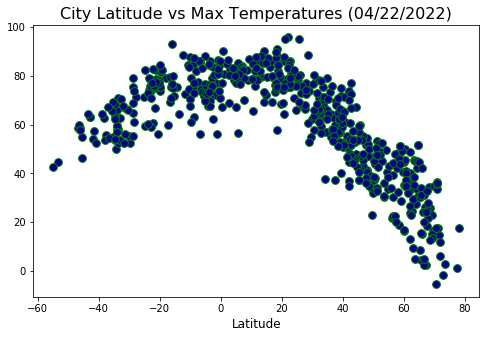

In [44]:
# Create parameters to graph scatter plot - used Matplotlib (plt) but can use Pandas (pd)
plt.rcParams["figure.figsize"] = (8,5)
plt.scatter(x = clean_city_data["Latitude"],y= clean_city_data["Temperature"], 
            s=60, c="darkblue", edgecolors= "green")
plt.title("City Latitude vs Max Temperatures (04/22/2022)", fontsize= 16)
plt.xlabel("Latitude", fontsize =12)
plt.ylabel("Max Temperature (F)", fontsize= 12)
plt.ylim(-25, 120)
plt.grid()

# Export scatterplot as png
plt.savefig("/Users/tanishacooper/code/python-api-challenge/Images/Scatter_Lat_Temp.png", 
            index= False)

# Show scatter plot
plt.show()

## Latitude vs. Humidity Plot

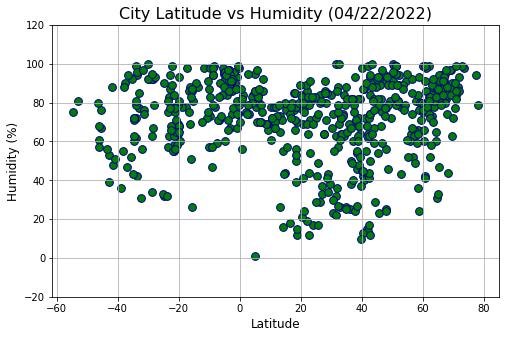

In [12]:
# Create parameters to graph scatter plot - used Matplotlib (plt) but can use Pandas (pd)
plt.rcParams["figure.figsize"] = (8,5)
plt.scatter(x = clean_city_data["Latitude"],y= clean_city_data["Humidity"], 
            s=60, c="green", edgecolors= "darkblue")
plt.title("City Latitude vs Humidity (04/22/2022)", fontsize= 16)
plt.xlabel("Latitude", fontsize =12)
plt.ylabel("Humidity (%)", fontsize= 12)
plt.ylim(-20, 120)
plt.grid()

# Export scatterplot as png
plt.savefig("/Users/tanishacooper/code/python-api-challenge/WeatherPy/Scatter_Lat_Humidity.png", 
            index= False)

# Show scatter plot
plt.show()

## Latitude vs. Cloudiness Plot

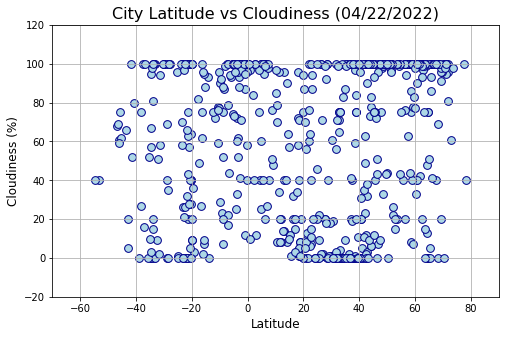

In [13]:
# Create parameters to graph scatter plot - used Matplotlib (plt) but can use Pandas (pd)
plt.rcParams["figure.figsize"] = (8,5)
plt.scatter(x = clean_city_data["Latitude"],y= clean_city_data["Cloudiness"], 
            s=60, c="lightblue", edgecolors= "darkblue")
plt.title("City Latitude vs Cloudiness (04/22/2022)", fontsize= 16)
plt.xlabel("Latitude", fontsize =12)
plt.ylabel("Cloudiness (%)", fontsize= 12)
plt.xlim(-70,90)
plt.ylim(-20, 120)
plt.grid()

# Export scatterplot as png
plt.savefig("/Users/tanishacooper/code/python-api-challenge/WeatherPy/Scatter_Lat_Cloudiness.png", 
            index= False)

# Show scatter plot
plt.show()

## Latitude vs. Wind Speed Plot

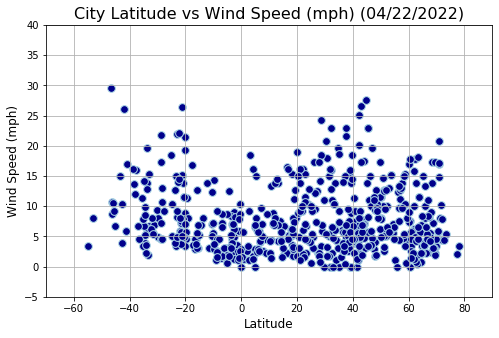

In [14]:
# Create parameters to graph scatter plot - used Matplotlib (plt) but can use Pandas (pd)
plt.rcParams["figure.figsize"] = (8,5)
plt.scatter(x = clean_city_data["Latitude"],y= clean_city_data["Windspeed"], 
            s=60, c="darkblue", edgecolors= "lightblue")
plt.title("City Latitude vs Wind Speed (mph) (04/22/2022)", fontsize= 16)
plt.xlabel("Latitude", fontsize =12)
plt.ylabel("Wind Speed (mph)", fontsize= 12)
plt.xlim(-70,90)
plt.ylim(-5, 40)
plt.grid()

# Export scatterplot as png
plt.savefig("/Users/tanishacooper/code/python-api-challenge/WeatherPy/Scatter_Lat_Windspeed.png", 
            index= False)

# Show scatter plot
plt.show()

## Linear Regression

In [15]:
# Create variables for the Northern and Southern Hemispheres
north_hemisphere_df = clean_city_data.loc[pd.to_numeric(clean_city_data
                                                        ["Latitude"]).astype(float) >= 0, :]

#north_hemisphere_df

south_hemisphere_df = clean_city_data.loc[pd.to_numeric(clean_city_data
                                                        ["Latitude"]).astype(float) < 0, :]
#south_hemisphere_df 

In [16]:
# Create x and y values from the northern hemisphere DataFrame and turned it into a float
x = pd.to_numeric(north_hemisphere_df["Latitude"]).astype(float)
y = pd.to_numeric(north_hemisphere_df["Temperature"].astype(float))

# Use scipy to pull in values below easier (linregress)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)

# Create line regression values
line_regress_value = x * slope + intercept
#line_regress_value

# Create line equation y = mx + b: m = slope, b = intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#line_eq

The r-squared is: -0.8860581117941898
y = -1.01x + 95.26


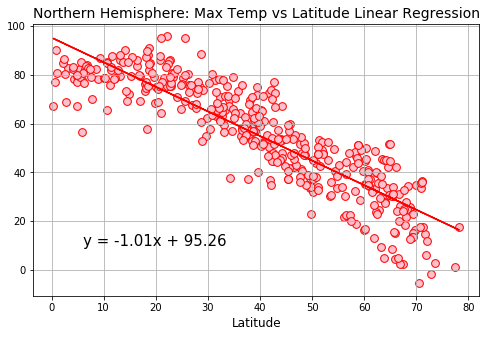

In [41]:
# Plot scatter plot, line regression, and line equation for Northern Hemisphere

plt.rcParams["figure.figsize"] = (8,5)
plt.scatter(x,y, s=60, c= "pink", edgecolors= "red")

plt.plot(x,line_regress_value,"r-")
plt.annotate(line_eq,(6,10), fontsize= 15, color="black")
plt.title("Northern Hemisphere: Max Temp vs Latitude Linear Regression", fontsize= 14)
#plt.ylabel("Max Temperature(F)")
plt.xlabel("Latitude", fontsize= 12)

# xlim(0,90)
# ylim(-20, 120)

plt.grid()
print(f"The r-squared is: {rvalue}")
print(line_eq)

plt.show()